# Homonyms Problem In Sentences IN NLP 
# by **Ahmed Essam**

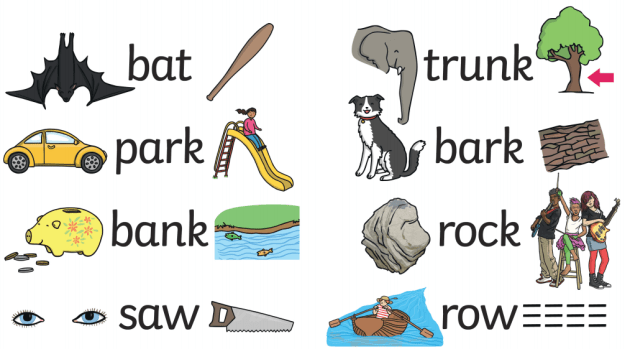

**Homonymy and the Challenge of Sentiment Analysis**

Homonyms, words with identical spellings but distinct meanings, pose a significant challenge in natural language processing tasks, particularly sentiment analysis. The semantic context in which a homonym is used can drastically alter the overall sentiment of a sentence.

For example, consider the word "bank":

Financial Institution: "I'm worried about the bank's interest rates."

Edge of a River: "We sat by the river bank and watched the sunset."

In the first sentence, "bank" conveys a financial concern, while in the second, it implies a serene outdoor setting.

Traditional methods, relying on fixed word embeddings, often struggle to capture these nuances. Fixed embeddings assign a single vector representation to a word, regardless of its context. This can lead to misinterpretations, especially in cases of homonymy.

## Importing the necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from datasets import load_dataset
import warnings
warnings.filterwarnings("ignore")
import datasets
datasets.__version__
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

from datasets import load_dataset
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

'3.1.0'

## Loading the exploring the dataset

In [3]:
ds = load_dataset("sst2")

In [4]:
ds

DatasetDict({
    train: Dataset({
        features: ['idx', 'sentence', 'label'],
        num_rows: 67349
    })
    validation: Dataset({
        features: ['idx', 'sentence', 'label'],
        num_rows: 872
    })
    test: Dataset({
        features: ['idx', 'sentence', 'label'],
        num_rows: 1821
    })
})

In [5]:
ds['train'].features['label']

ClassLabel(names=['negative', 'positive'], id=None)

In [6]:
train_df = pd.DataFrame(ds["train"])
val_df = pd.DataFrame(ds["validation"])
test_df = pd.DataFrame(ds["test"])

In [7]:
train_df.to_csv(r'D:/projects/homonyms/DATASET/train_df.csv', index=False)
val_df.to_csv(r'D:/projects/homonyms/DATASET/val_df.csv', index=False)
test_df.to_csv(r'D:/projects/homonyms/DATASET/test_df.csv', index=False)


In [157]:
train_df.head(5)

,idx,sentence,label
0,0,hide new secretions from the parental units,0
1,1,"contains no wit , only labored gags",0
2,2,that loves its characters and communicates som...,1
3,3,remains utterly satisfied to remain the same t...,0
4,4,on the worst revenge-of-the-nerds clichés the ...,0


## Converting the label column to str

In [158]:
replace_values = {0: "Negative", 1: "Positive"}  

train_df['label_str'] = train_df['label'].replace(replace_values)
print(train_df.head())


   idx                                           sentence  label label_str
0    0       hide new secretions from the parental units       0  Negative
1    1               contains no wit , only labored gags       0  Negative
2    2  that loves its characters and communicates som...      1  Positive
3    3  remains utterly satisfied to remain the same t...      0  Negative
4    4  on the worst revenge-of-the-nerds clichés the ...      0  Negative


In [159]:
train_df

,idx,sentence,label,label_str
0,0,hide new secretions from the parental units,0,Negative
1,1,"contains no wit , only labored gags",0,Negative
2,2,that loves its characters and communicates som...,1,Positive
3,3,remains utterly satisfied to remain the same t...,0,Negative
4,4,on the worst revenge-of-the-nerds clichés the ...,0,Negative
...,...,...,...,...
67344,67344,a delightful comedy,1,Positive
67345,67345,"anguish , anger and frustration",0,Negative
67346,67346,"at achieving the modest , crowd-pleasing goals...",1,Positive
67347,67347,a patient viewer,1,Positive


In [160]:
val_df

,idx,sentence,label
0,0,it 's a charming and often affecting journey .,1
1,1,unflinchingly bleak and desperate,0
2,2,allows us to hope that nolan is poised to emba...,1
3,3,"the acting , costumes , music , cinematography...",1
4,4,"it 's slow -- very , very slow .",0
...,...,...,...
867,867,has all the depth of a wading pool .,0
868,868,a movie with a real anarchic flair .,1
869,869,a subject like this should inspire reaction in...,0
870,870,... is an arthritic attempt at directing by ca...,0


## EDA 

In [161]:
dic = {"negative":0, "positive":0}
for i in train_df['label_str']:
    if i == "Negative":
        dic["negative"] += 1
    dic["positive"] += 1    
print(dic)   

{'negative': 29780, 'positive': 67349}


In [162]:
labels = list(dic.keys())
values = list(dic.values())

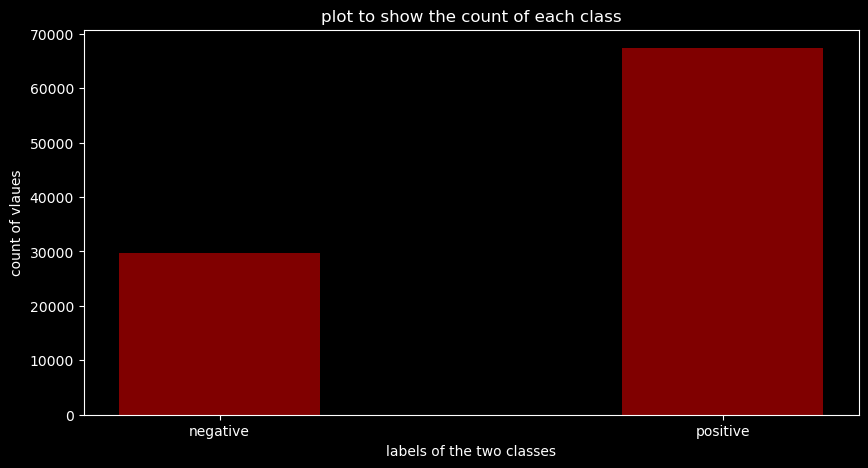

In [163]:
plt.style.use("dark_background")
fig = plt.figure(figsize=(10, 5))
plt.bar(labels, values, color = "maroon", width = 0.4)
plt.xlabel("labels of the two classes")
plt.ylabel("count of vlaues")
plt.title("plot to show the count of each class")
plt.show()

### As plotiing the distribution of the classes I can see that the two classes are almost balanced 

### Plotting the word frequent using word cloud to see the most words with most occurance 

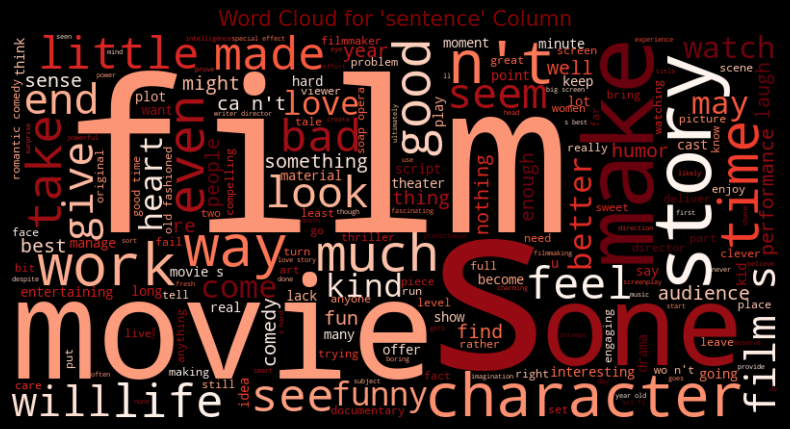

In [164]:
text = ''.join(train_df['sentence'].astype(str))
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black', max_words=200, colormap='Reds').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title("Word Cloud for 'sentence' Column", fontsize=15, color= "maroon")
plt.show()

### The top 30 words in this dataset

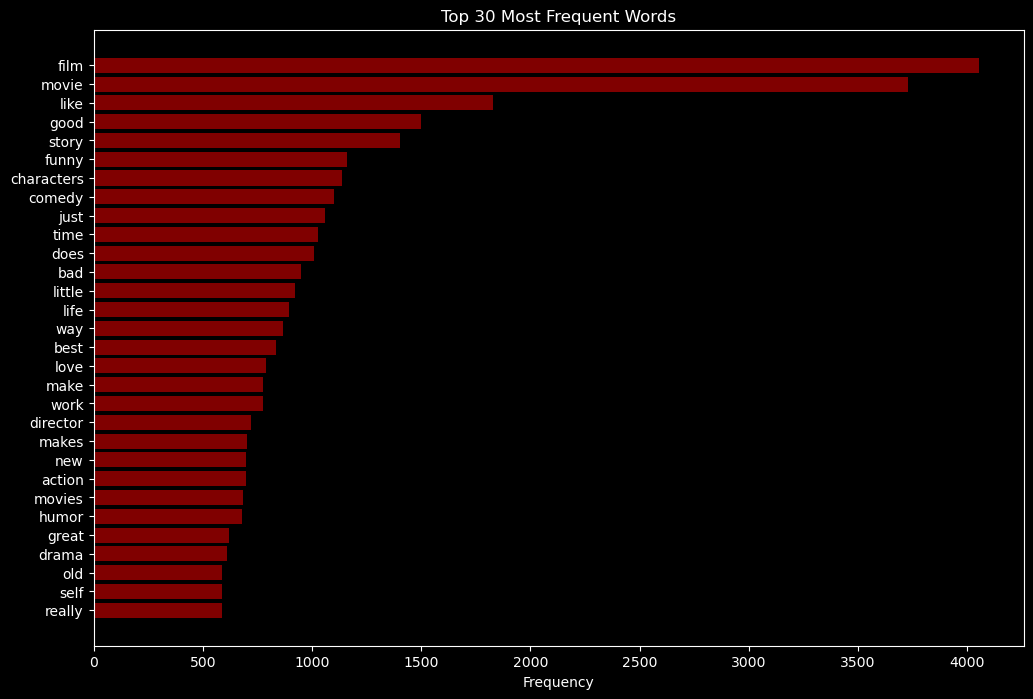

In [165]:
vectorizer = CountVectorizer(stop_words="english")
word_counts = vectorizer.fit_transform(train_df["sentence"].astype(str))

word_sum = word_counts.sum(axis=0)
word_freq = [(word, word_sum[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)

# Convert to DataFrame and select the top 30 words
top_30_words = pd.DataFrame(word_freq[:30], columns=['word', 'frequency'])


plt.figure(figsize=(12, 8))
plt.barh(top_30_words['word'], top_30_words['frequency'], color='maroon')
plt.gca().invert_yaxis()  
plt.xlabel('Frequency')
plt.title('Top 30 Most Frequent Words')
plt.show()

## Converting Text to Integers

In [ ]:

tokenizer = Tokenizer()
# Fittng the tokenizer on the training data
tokenizer.fit_on_texts(train_df['sentence'])

# Use the tokenizer to convert sentences to integers
train_sequences = tokenizer.texts_to_sequences(train_df['sentence'])
valid_sequences = tokenizer.texts_to_sequences(val_df['sentence'])

In [167]:
word2idx = tokenizer.word_index
# The reason for adding one to be able to map the [padding token]
vocab_size = len(word2idx) + 1
print(f"Total vocab size: {vocab_size}")

Total vocab size: 13823


In [168]:
max_train_sequence_length = max(len(seq) for seq in train_sequences)
max_valid_sequence_length = max(len(seq) for seq in valid_sequences)

print(f"Maximum number of words in training data: {max_train_sequence_length}")
print(f"Maximum number of words in validation data: {max_valid_sequence_length}")

max_sequence_length = max(max_train_sequence_length, max_valid_sequence_length)
print(f"Maximum sequence length: {max_sequence_length}")

train_padded_sequences = pad_sequences(train_sequences, maxlen=max_sequence_length, padding='post')
valid_padded_sequences = pad_sequences(valid_sequences, maxlen=max_sequence_length, padding='post')

print(f"Train padded sequence shape: {train_padded_sequences.shape}")
print(f"Validation padded sequence shape: {valid_padded_sequences.shape}")

Maximum number of words in training data: 49
Maximum number of words in validation data: 43
Maximum sequence length: 49
Train padded sequence shape: (67349, 49)
Validation padded sequence shape: (872, 49)


## Model building 

### Testing three different Models ['LSTM', 'GRU', 'CNN']

In [169]:

param_grid = {
    'model_type': ['LSTM', 'GRU', 'CNN'],
    'embedding_dim': [64, 128],
    'units': [32, 64],
    'dropout_rate': [0.3, 0.5]
}


def create_model(model_type, embedding_dim, units, dropout_rate):
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_sequence_length))

    if model_type == 'LSTM':
        model.add(LSTM(units))
    elif model_type == 'GRU':
        model.add(GRU(units))
    elif model_type == 'CNN':
        model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
        model.add(GlobalMaxPooling1D())

    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [170]:
best_accuracy = 0
best_params = None
best_model = None

for model_type in param_grid['model_type']:
    for embedding_dim in param_grid['embedding_dim']:
        for units in param_grid['units']:
            for dropout_rate in param_grid['dropout_rate']:
                
                # Create the model
                model = create_model(model_type, embedding_dim, units, dropout_rate)
                
                # Early stopping to prevent overfitting
                early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
                print(model_type)

                # Train the model
                model.fit(
                    train_padded_sequences, train_df['label'], 
                    validation_data=(valid_padded_sequences, val_df['label']),
                    epochs=5, batch_size=32, callbacks=[early_stopping], verbose=1
                )
                # Predict and evaluate on validation data
                val_predictions = (model.predict(valid_padded_sequences) > 0.5).astype("int32")
                accuracy = accuracy_score(val_df['label'], val_predictions)
                
                # Update best model if current one is better
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_params = (model_type, embedding_dim, units, dropout_rate)
                    best_model = model

print(f"Best Accuracy: {best_accuracy} with params: {best_params}")


LSTM
Epoch 1/5
2105/2105 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.5549 - loss: 0.6879 - val_accuracy: 0.5092 - val_loss: 0.6975
Epoch 2/5
2105/2105 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.5561 - loss: 0.6873 - val_accuracy: 0.5092 - val_loss: 0.6967
Epoch 3/5
2105/2105 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.5570 - loss: 0.6868 - val_accuracy: 0.5092 - val_loss: 0.7006
Epoch 4/5
2105/2105 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.5588 - loss: 0.6865 - val_accuracy: 0.5092 - val_loss: 0.6981
Epoch 5/5
2105/2105 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.5640 - loss: 0.6810 - val_accuracy: 0.7993 - val_loss: 0.4500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
LSTM
Epoch 1/5
2105/2105 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5551 - loss: 0.6875 - val_accuracy: 0.5092 - val_loss: 0.6980
Epoch 2/5
2105/2105 ━━━━━━━━━━━━━━━━━━━━ 47s 22ms/step - accuracy: 0.5585 - loss: 0.6872 - val_accuracy: 0.5092 - val_loss: 0.6946
Epoch 3/5
2105/2105 ━━━━━━━━━━━━━━━━━━━━

#### So after knowing that the best model was "LSTM" with parameters
    'model_type': ['LSTM'],
    'embedding_dim': [128],
    'units': [32],
    'dropout_rate': [0.3]

#### Then We will use this model 


In [179]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Set parameters based on your specified hyperparameters
embedding_dim = 128
lstm_units = 32
dropout_rate = 0.3
max_sequence_length = train_padded_sequences.shape[1]  # This should be the same as your padded sequences length

# Define the model architecture
def build_lstm_model():
    model = Sequential()
    
    # Embedding layer
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, 
                        output_dim=embedding_dim, 
                        input_length=max_sequence_length))
    
    # LSTM layer
    model.add(LSTM(lstm_units))
    model.add(Dropout(dropout_rate))
    
    # Fully connected output layer
    model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification
    
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# Build and compile the model
lstm_model = build_lstm_model()

# Display the model summary
lstm_model.summary()

# You can train the model like this:
history = lstm_model.fit(train_padded_sequences, train_df['label'], validation_data=(valid_padded_sequences, val_df['label']), epochs=10, batch_size=32)


Model: "sequential_57"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_57 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_27 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_59 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
2105/2105 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.5529 - loss: 0.6883 - val_accuracy: 0.5092 - val_loss: 0.6961
Epoch 2/10
2105/2105 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.5610 - loss: 0.6862 - val_accuracy: 0.5092 - val_loss: 0.6968
Epoch 3/10
2105/2105 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.5578 - loss: 0.6867 - val_accuracy: 0.5092 - val_loss: 0.6947
Epoch 4/10
2105/2105 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.5554 - loss: 0.6870 - val_accuracy: 0.5092 - val_loss: 0.6969
Epoch 5/10
2105/2105 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.5824 - loss: 0.6604 - val_accuracy: 0.8211 - val_loss: 0.4180
Epoch 6/10
2105/2105 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9037 - loss: 0.2551 - val_accuracy: 0.8303 - val_loss: 0.4566
Epoch 7/10
2105/2105 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9431 - loss: 0.1531 - val_accuracy: 0.8268 - val_loss: 0.4750
Epoch 8/10
2105/2105 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.9644 - lo

### Plotting the results with Trainig and validation sets 

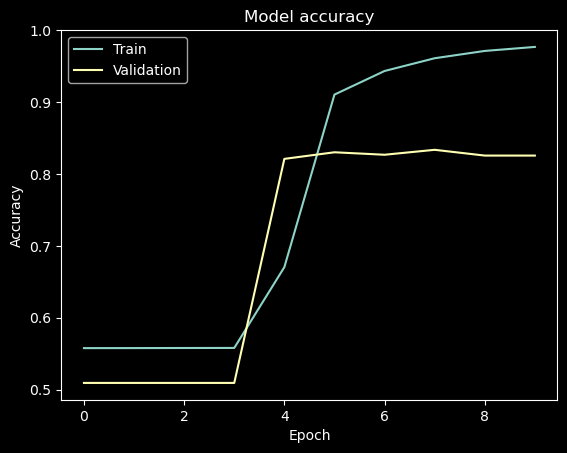

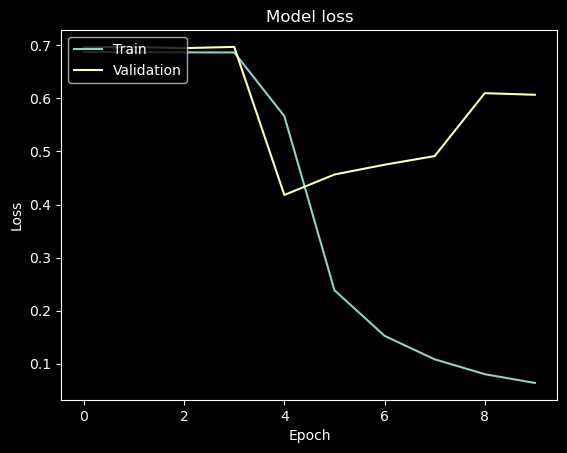

In [181]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [187]:


# Convert probabilities to binary labels
train_predictions = (lstm_model.predict(train_padded_sequences) > 0.5).astype(int)
val_predictions = (lstm_model.predict(valid_padded_sequences) > 0.5).astype(int)


2105/2105 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


Training Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     29780
           1       0.98      0.99      0.99     37569

    accuracy                           0.99     67349
   macro avg       0.99      0.98      0.99     67349
weighted avg       0.99      0.99      0.99     67349



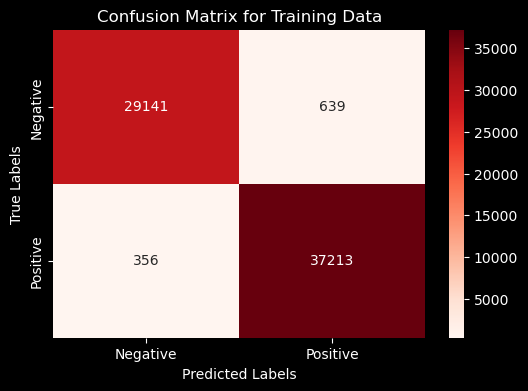

In [188]:
# Training Classification Report
print("Training Classification Report:")
print(classification_report(train_df['label'], train_predictions))

# Training Confusion Matrix
train_cm = confusion_matrix(train_df['label'], train_predictions)

# Plot Confusion Matrix for Training Data
plt.figure(figsize=(6, 4))
sns.heatmap(train_cm, annot=True, fmt="d", cmap="Reds", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Training Data")
plt.show()


Validation Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       428
           1       0.83      0.83      0.83       444

    accuracy                           0.83       872
   macro avg       0.83      0.83      0.83       872
weighted avg       0.83      0.83      0.83       872



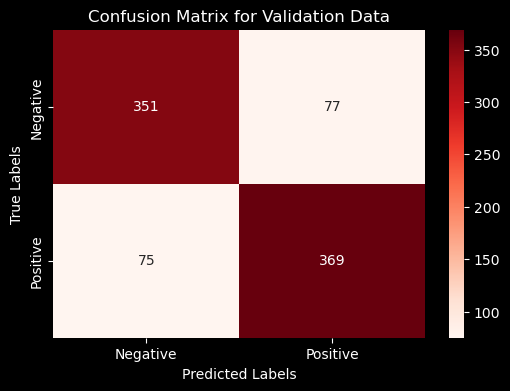

In [189]:
# Validation Classification Report
print("Validation Classification Report:")
print(classification_report(val_df['label'], val_predictions))

# Validation Confusion Matrix
val_cm = confusion_matrix(val_df['label'], val_predictions)

# Plot Confusion Matrix for Validation Data
plt.figure(figsize=(6, 4))
sns.heatmap(val_cm, annot=True, fmt="d", cmap="Reds", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Validation Data")
plt.show()


In [190]:
homonym_test_cases = [
    {"text": "The bass was amazing to listen to at the concert", "label": "POSITIVE"},  
    {"text": "The farmer went to produce a new variety of apple", "label": "POSITIVE"}, 
    {"text": "The tear in her dress was unfortunate", "label": "NEGATIVE"},  
    {"text": "He wound up the clock and prepared for the day", "label": "POSITIVE"},  
    {"text": "I’ll park by the river to read a good book", "label": "POSITIVE"},  
    {"text": "The artist decided to rock the stage tonight", "label": "POSITIVE"},  
    {"text": "She shed a tear when she saw the results", "label": "NEGATIVE"},  
    {"text": "The bow was tied neatly around the gift", "label": "POSITIVE"},  
    {"text": "He was asked to lead the meeting", "label": "POSITIVE"},  
    {"text": "I can’t bear the thought of losing", "label": "NEGATIVE"},  
    {"text": "The duck refused to budge from the pond", "label": "POSITIVE"},  
    {"text": "She refused to desert her friend in need", "label": "POSITIVE"},  
    {"text": "I didn’t mind the cold wind, but the wind in the path was annoying", "label": "NEGATIVE"},  
    {"text": "He got the permit to work in the construction area", "label": "POSITIVE"},  
    {"text": "I had to duck when the ball came flying at me", "label": "NEGATIVE"},  
]

# Convert to DataFrame
homonym_test_cases_df = pd.DataFrame(homonym_test_cases)

In [192]:
# Tokenize and pad the sentences for model input
homonym_test_sequences = tokenizer.texts_to_sequences(homonym_test_cases_df['text'])
homonym_test_padded_sequences = pad_sequences(homonym_test_sequences, maxlen=max_sequence_length, padding='post')

# Predict using the model
predicted_scores_homonym = lstm_model.predict(homonym_test_padded_sequences)

# Add predictions to DataFrame
homonym_test_cases_df['predicted_score'] = predicted_scores_homonym
homonym_test_cases_df['predicted_label'] = homonym_test_cases_df['predicted_score'].apply(lambda x: "POSITIVE" if x >= 0.2 else "NEGATIVE")

# Display the results
homonym_test_cases_df[['text', 'label', 'predicted_score', 'predicted_label']]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


,text,label,predicted_score,predicted_label
0,The bass was amazing to listen to at the concert,POSITIVE,0.999711,POSITIVE
1,The farmer went to produce a new variety of apple,POSITIVE,0.471692,POSITIVE
2,The tear in her dress was unfortunate,NEGATIVE,0.013828,NEGATIVE
3,He wound up the clock and prepared for the day,POSITIVE,0.459765,POSITIVE
4,I’ll park by the river to read a good book,POSITIVE,0.868612,POSITIVE
5,The artist decided to rock the stage tonight,POSITIVE,0.001069,NEGATIVE
6,She shed a tear when she saw the results,NEGATIVE,0.366320,POSITIVE
7,The bow was tied neatly around the gift,POSITIVE,0.997682,POSITIVE
8,He was asked to lead the meeting,POSITIVE,0.008404,NEGATIVE
9,I can’t bear the thought of losing,NEGATIVE,0.995474,POSITIVE


### So Using the traditional way with simple tokenizer had some issues capturing the meaning of the words, Now I will use "transformer-based models like BERT", that have emerged as powerful tools. These models consider the surrounding context of a word to generate dynamic embeddings. By leveraging attention mechanisms, they can better capture the intended meaning of a homonym, leading to more accurate sentiment analysis.

In [17]:
import tensorflow as tf
from transformers import TFBertForSequenceClassification, BertTokenizer
from transformers import TFBertForSequenceClassification, BertTokenizer, AdamW
from sklearn.model_selection import train_test_split

# Load the pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

def tokenize(batch, tokenizer):
    """
    Tokenize a batch of sentences using a given `tokenizer`.

    Parameters
    ----------
    - batch : dict
        A dictionary containing a key 'sentence' with a list of sentences.

    - tokenizer : transformers.AutoTokenizer
        The tokenizer used for tokenization.

    Returns
    -------
    dict
        A dictionary containing the tokenized sequences with padding and truncation.
    """

    return tokenizer(batch["sentence"], padding=True, truncation=True)

dataset_encoded = ds.map(tokenize, batched=True, batch_size=None, fn_kwargs={"tokenizer": tokenizer})


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/67349 [00:00<?, ? examples/s]

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Map:   0%|          | 0/1821 [00:00<?, ? examples/s]

In [18]:
print(f"Dataset after encoding:")
print(dataset_encoded)

Dataset after encoding:
DatasetDict({
    train: Dataset({
        features: ['idx', 'sentence', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 67349
    })
    validation: Dataset({
        features: ['idx', 'sentence', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 872
    })
    test: Dataset({
        features: ['idx', 'sentence', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1821
    })
})


In [21]:
# Choose only the ['input_ids', 'attention_mask']
tokenizer_columns = tokenizer.model_input_names

tf_train_dataset = dataset_encoded["train"].to_tf_dataset(
    columns=tokenizer_columns, label_cols=["label"], shuffle=True,
    batch_size=32)

tf_valid_dataset = dataset_encoded["validation"].to_tf_dataset(
    columns=tokenizer_columns, label_cols=["label"], shuffle=False,
    batch_size=32)

In [25]:
from tensorflow import keras

model.compile(
    optimizer='adam',
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [26]:
history = model.fit(tf_train_dataset, validation_data=tf_valid_dataset, epochs=3)


Epoch 1/3


2105/2105 [==============================] - 9940s 5s/step - loss: 0.6919 - accuracy: 0.5489 - val_loss: 0.7269 - val_accuracy: 0.5092
Epoch 2/3
2105/2105 [==============================] - 28392s 13s/step - loss: 0.6885 - accuracy: 0.5529 - val_loss: 0.7081 - val_accuracy: 0.5092
Epoch 3/3
2105/2105 [==============================] - 26226s 12s/step - loss: 0.6878 - accuracy: 0.5553 - val_loss: 0.7127 - val_accuracy: 0.5092


In [ ]:


model_ckpt = "distilbert-base-cased"
distilbert_tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
distilbert_model = TFAutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=2)

model.safetensors:   0%|          | 0.00/263M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [30]:
def tokenize(batch, tokenizer):
    """
    Tokenize a batch of sentences using a given `tokenizer`.

    Parameters
    ----------
    - batch : dict
        A dictionary containing a key 'sentence' with a list of sentences.

    - tokenizer : transformers.AutoTokenizer
        The tokenizer used for tokenization.

    Returns
    -------
    dict
        A dictionary containing the tokenized sequences with padding and truncation.
    """

    return tokenizer(batch["sentence"], padding=True, truncation=True)

dataset_encoded = ds.map(tokenize, batched=True, batch_size=None, fn_kwargs={"tokenizer": distilbert_tokenizer})

Map:   0%|          | 0/67349 [00:00<?, ? examples/s]

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Map:   0%|          | 0/1821 [00:00<?, ? examples/s]

In [31]:
print(f"Dataset after encoding:")
print(dataset_encoded)

Dataset after encoding:
DatasetDict({
    train: Dataset({
        features: ['idx', 'sentence', 'label', 'input_ids', 'attention_mask'],
        num_rows: 67349
    })
    validation: Dataset({
        features: ['idx', 'sentence', 'label', 'input_ids', 'attention_mask'],
        num_rows: 872
    })
    test: Dataset({
        features: ['idx', 'sentence', 'label', 'input_ids', 'attention_mask'],
        num_rows: 1821
    })
})


In [33]:
# Choose only the ['input_ids', 'attention_mask']
tokenizer_columns = distilbert_tokenizer.model_input_names

tf_train_dataset = dataset_encoded["train"].to_tf_dataset(
    columns=tokenizer_columns, label_cols=["label"], shuffle=True,
    batch_size=32)

tf_valid_dataset = dataset_encoded["validation"].to_tf_dataset(
    columns=tokenizer_columns, label_cols=["label"], shuffle=False,
    batch_size=32)

In [36]:
distilbert_model.compile(
    optimizer='Adam',
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"])

In [37]:
history = distilbert_model.fit(tf_train_dataset, validation_data=tf_valid_dataset, epochs=3)

Epoch 1/3
2105/2105 [==============================] - 6647s 3s/step - loss: 0.6885 - accuracy: 0.5557 - val_loss: 0.7000 - val_accuracy: 0.5092
Epoch 2/3
2105/2105 [==============================] - 8435s 4s/step - loss: 0.6869 - accuracy: 0.5572 - val_loss: 0.6977 - val_accuracy: 0.5092
Epoch 3/3
2105/2105 [==============================] - 11982s 6s/step - loss: 0.6865 - accuracy: 0.5576 - val_loss: 0.6988 - val_accuracy: 0.5092
